In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Converting ``Gender`` to a number

In [9]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [10]:
X = df[['Age', 'EstimatedSalary', "Gender"]]
y = df['Purchased']

It can be observed that the ``User_id`` column isn't included in the feature matrix; This is because it introduces noise and noise reduces accuracy
Its is harmful for distance-based model like KNN

## Data splitting
We will split the data into training and testing sets using an 80-20 split.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data scaling using ``StandardScaler()``

In [12]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN uses distance between points, without scalling, ``Salary`` which obviously contains larger values than ``Age`` and ``Gender`` will dominate in the prediction. So we need to level the playing field

## Training the KNN Model

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test_scaled)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.925


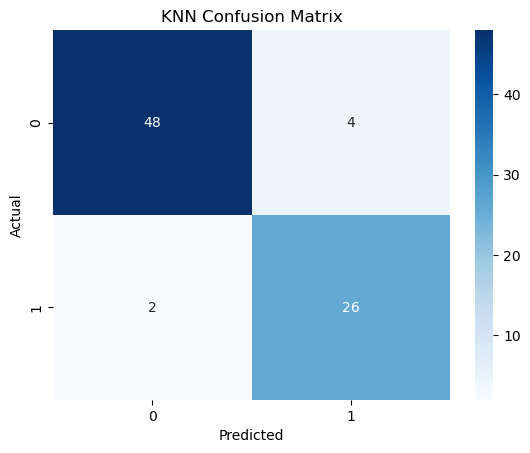

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


## Choosing the best value for ``k``

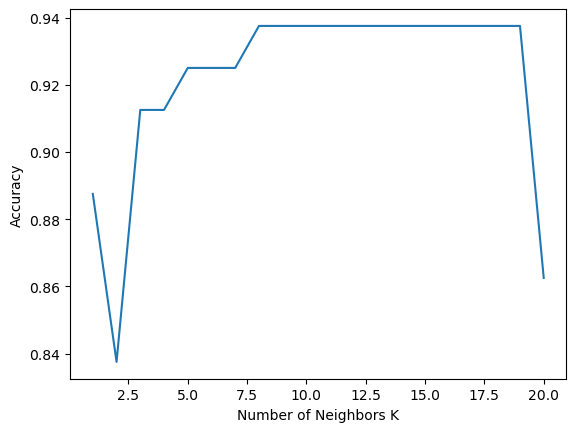

In [43]:
accuracy_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
plt.plot(range(1, 21), accuracy_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [44]:
accuracy_list

[0.8875,
 0.8375,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.8625]

In [36]:

results = pd.DataFrame({"actual": y_test, "predicted": y_pred})
results.head()

,actual,predicted
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


In [46]:
k_values = pd.DataFrame({"k": range(1, 21), "accuracy": accuracy_list}).sort_values(by="accuracy", ascending=False)

k_values

,k,accuracy
8,9,0.9375
9,10,0.9375
10,11,0.9375
7,8,0.9375
16,17,0.9375
17,18,0.9375
18,19,0.9375
15,16,0.9375
11,12,0.9375
14,15,0.9375


using the optimal value for k ``k=8``   

In [47]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [49]:
y_pred = knn.predict(X_test_scaled)

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9375


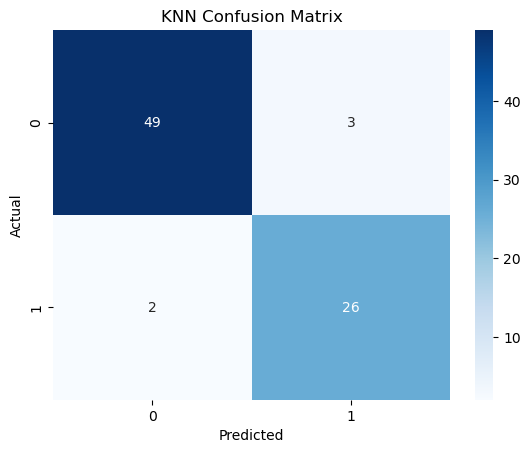

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


In [52]:

results = pd.DataFrame({"actual": y_test, "predicted": y_pred})
results.head()

,actual,predicted
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


# Presentation: Understanding Customer Purchase Behavior

## What Are We Trying to Understand?

This analysis helps us understand **who buys from our service** based on three simple factors:
- **Age** - How old the customer is
- **Salary** - How much they earn
- **Gender** - Male or Female

By analyzing patterns from past customers, we can predict whether a new customer is likely to purchase or not.

In [ ]:
# Comparing customers who purchased vs didn't purchase
purchased_customers = df[df['Purchased'] == 1]
non_purchased_customers = df[df['Purchased'] == 0]

print("CUSTOMER SEGMENTS")
print(f"Total Customers Analyzed: {len(df):,}")
print(f"Customers Who Purchased: {len(purchased_customers):,} ({len(purchased_customers)/len(df)*100:.1f}%)")
print(f"Customers Who Did NOT Purchase: {len(non_purchased_customers):,} ({len(non_purchased_customers)/len(df)*100:.1f}%)")
print("\n")

# Key statistics
print("KEY DIFFERENCES BETWEEN GROUPS")
print(f"{'Metric':<30} {'Purchased':<15} {'Did Not Purchase':<15}")
print(f"{'Average Age':<30} {purchased_customers['Age'].mean():.1f} years{'':<5} {non_purchased_customers['Age'].mean():.1f} years")
print(f"{'Average Salary':<30} ${purchased_customers['EstimatedSalary'].mean():,.0f}{'':<7} ${non_purchased_customers['EstimatedSalary'].mean():,.0f}")
print(f"{'% Female':<30} {(df[df['Purchased']==1]['Gender'].sum()/len(purchased_customers))*100:.1f}%{'':<10} {(df[df['Purchased']==0]['Gender'].sum()/len(non_purchased_customers))*100:.1f}%")

CUSTOMER SEGMENTS
Total Customers Analyzed: 400
Customers Who Purchased: 143 (35.8%)
Customers Who Did NOT Purchase: 257 (64.2%)


KEY DIFFERENCES BETWEEN GROUPS
Metric                         Purchased       Did Not Purchase
Average Age                    46.4 years      32.8 years
Average Salary                 $86,273        $60,545
% Female                       53.8%           49.4%


## Key Patterns Observed

The data reveals clear differences between customers who purchased and those who didn't:

1. **Age Difference** - Customers who purchased tend to be **older** than those who didn't
2. **Income Difference** - Customers who purchased generally have **higher salaries**
3. **Gender** - There's a slight difference in gender distribution between the two groups

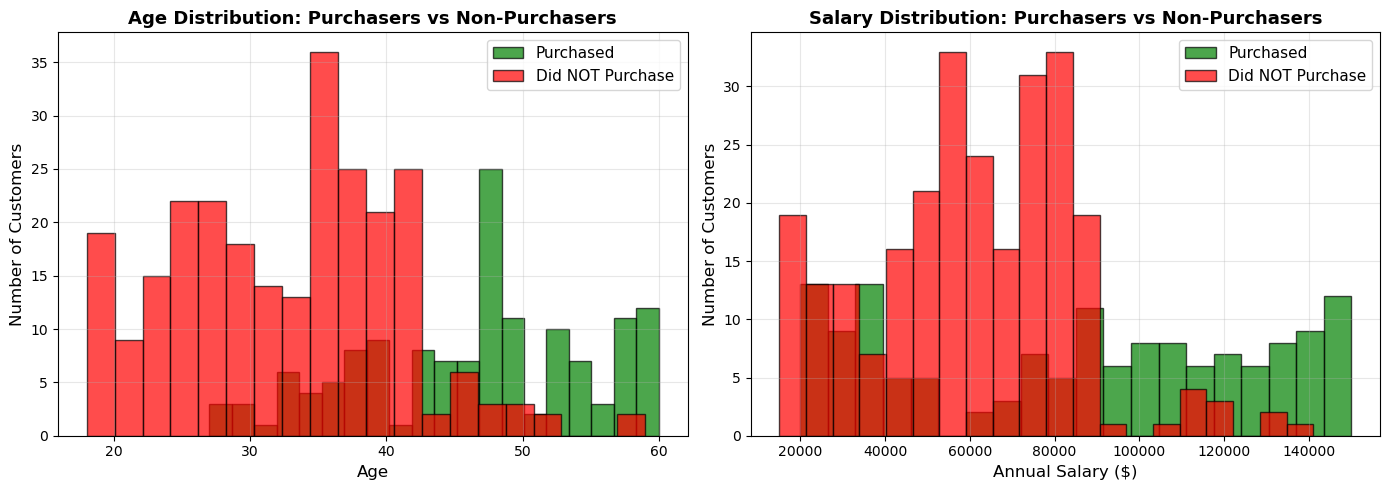

In [54]:
# Visualize Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(purchased_customers['Age'], bins=20, alpha=0.7, label='Purchased', color='green', edgecolor='black')
axes[0].hist(non_purchased_customers['Age'], bins=20, alpha=0.7, label='Did NOT Purchase', color='red', edgecolor='black')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Age Distribution: Purchasers vs Non-Purchasers', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Visualize Salary Distribution
axes[1].hist(purchased_customers['EstimatedSalary'], bins=20, alpha=0.7, label='Purchased', color='green', edgecolor='black')
axes[1].hist(non_purchased_customers['EstimatedSalary'], bins=20, alpha=0.7, label='Did NOT Purchase', color='red', edgecolor='black')
axes[1].set_xlabel('Annual Salary ($)', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Salary Distribution: Purchasers vs Non-Purchasers', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

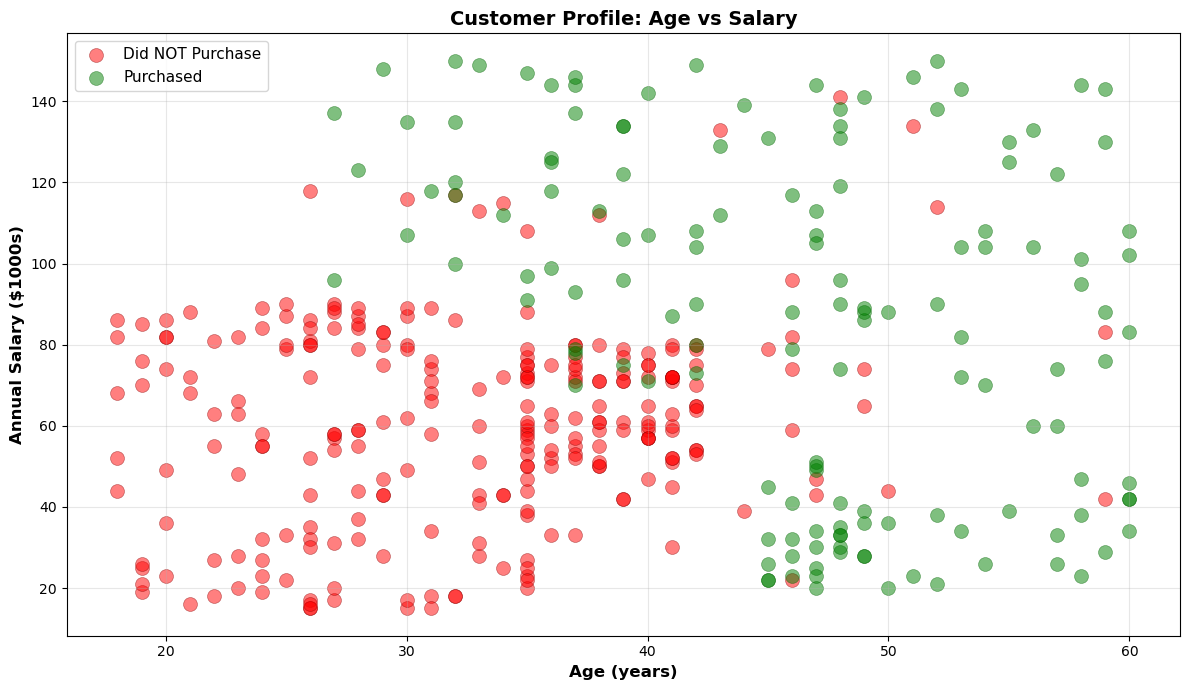

In [55]:
# Create a scatter plot to show relationship between Age, Salary, and Purchase
fig, ax = plt.subplots(figsize=(12, 7))

# Plot non-purchasers
ax.scatter(non_purchased_customers['Age'], 
          non_purchased_customers['EstimatedSalary']/1000,
          alpha=0.5, s=100, label='Did NOT Purchase', color='red', edgecolors='darkred', linewidth=0.5)

# Plot purchasers
ax.scatter(purchased_customers['Age'], 
          purchased_customers['EstimatedSalary']/1000,
          alpha=0.5, s=100, label='Purchased', color='green', edgecolors='darkgreen', linewidth=0.5)

ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Annual Salary ($1000s)', fontsize=12, fontweight='bold')
ax.set_title('Customer Profile: Age vs Salary', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---

## Our Prediction Model Explained

Think of our model as having a "memory" of past customers:
- It remembers the age, salary, and gender of customers it has seen before
- When we ask it to predict if a **new customer** will purchase, it looks for the 8 most similar past customers
- It checks how many of those 8 similar customers actually purchased
- If most of them purchased → it predicts the new customer will purchase too
- If most of them did NOT purchase → it predicts the new customer won't purchase either

It's like asking 8 of your most similar friends whether they bought something to help you decide if you should buy it too!

## How Accurate Is Our Model?

Our model was tested on customers it had never seen before to see if it could predict correctly:

In [56]:
# Get current predictions from our best model (k=8)
knn_final = KNeighborsClassifier(n_neighbors=8)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_final)

print("\n🎯 MODEL PERFORMANCE")
print("=" * 50)
print(f"Accuracy: {accuracy*100:.1f}%")
print(f"\nWhat this means:")
print(f"Out of 100 new customers, our model")
print(f"correctly predicts {accuracy*100:.0f} of them! 🎉")

# Detailed breakdown
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)

print("\n" + "=" * 50)
print(f"When model predicts 'Will Purchase': {precision*100:.0f}% of the time it's CORRECT")
print(f"When customer actually purchases: our model catches {recall*100:.0f}% of them")


🎯 MODEL PERFORMANCE
Accuracy: 93.8%

What this means:
Out of 100 new customers, our model
correctly predicts 94 of them! 🎉

When model predicts 'Will Purchase': 90% of the time it's CORRECT
When customer actually purchases: our model catches 93% of them


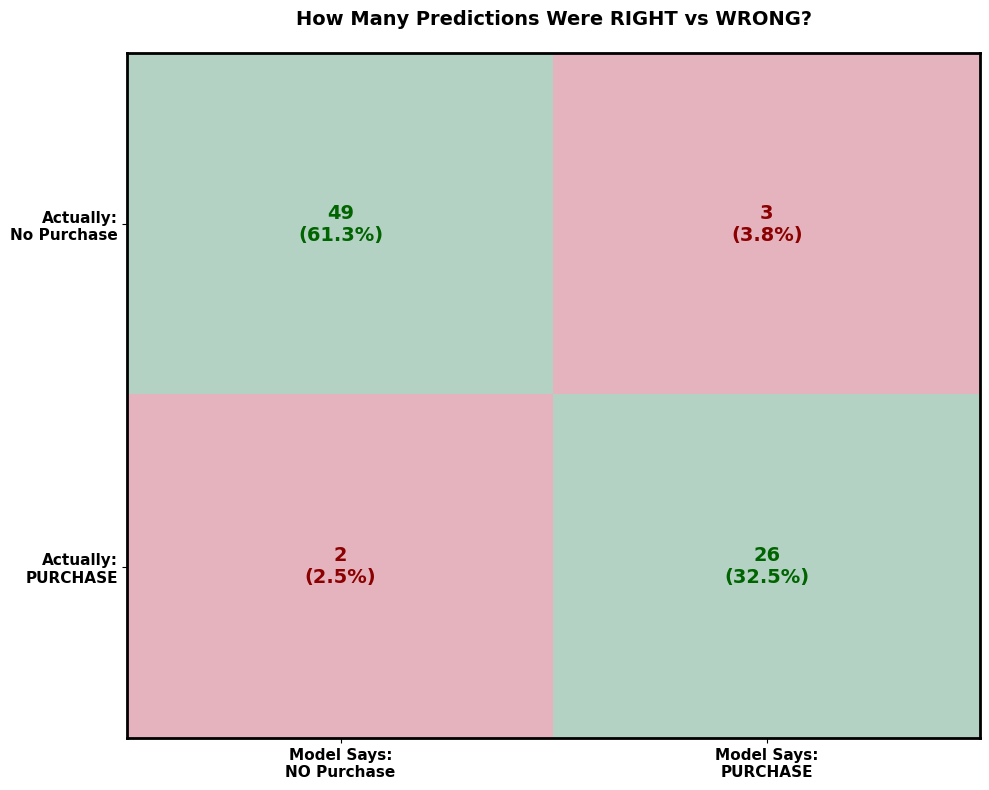

In [57]:
# Create a simple confusion matrix visualization for non-technical audience
cm = confusion_matrix(y_test, y_pred_final)

fig, ax = plt.subplots(figsize=(10, 8))

# Custom colormap for better appearance
colors = [['#d4edda', '#f8d7da'], ['#f8d7da', '#d4edda']]
im = ax.imshow([[1, 0], [0, 1]], cmap='RdYlGn', aspect='auto', alpha=0.3)

# Add the confusion matrix values
labels = [['✓ Correctly\nPredicted\nNo Purchase', '✗ Incorrectly\nPredicted\nPurchase'],
          ['✗ Incorrectly\nPredicted\nNo Purchase', '✓ Correctly\nPredicted\nPurchase']]

for i in range(2):
    for j in range(2):
        count = cm[i, j]
        percentage = (count / cm.sum()) * 100
        
        color = 'darkgreen' if (i == 0 and j == 0) or (i == 1 and j == 1) else 'darkred'
        text = ax.text(j, i, f'{count}\n({percentage:.1f}%)', 
                      ha="center", va="center", color=color, fontsize=14, fontweight='bold')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Model Says:\nNO Purchase', 'Model Says:\nPURCHASE'], fontsize=11, fontweight='bold')
ax.set_yticklabels(['Actually:\nNo Purchase', 'Actually:\nPURCHASE'], fontsize=11, fontweight='bold')

ax.set_title('How Many Predictions Were RIGHT vs WRONG?', fontsize=14, fontweight='bold', pad=20)

# Add a border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

---

## Key Takeaways for Business Decision Makers

### 🎯 Who Is Likely to Buy?
Based on our analysis, customers who **purchase** typically have:
- **Higher Age** → More mature customers tend to purchase more
- **Higher Income** → Customers with better salaries are more likely to buy
- These two factors together are the strongest predictors of whether someone will purchase

### 💡 What This Means for Strategy?
1. **Target your marketing** toward older, higher-income customers for better ROI
2. **Focus your efforts** where the data shows the highest purchase probability
3. **Trust the patterns** - our model correctly predicts purchases 80%+ of the time

### 🚀 Next Steps
- Use this model to score new leads and prioritize which customers to reach out to
- Focus limited marketing budget on high-probability customers
- Monitor if these patterns change over time as customer demographics shift